<h1 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Project Topic</h1>

<a id='table_of_contents'></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Table of Contents</h2>

1. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
2. <a href="#data_preview" style="text-decoration: None">Dataset Preview</a>
3. <a href="#data_wrangling" style="text-decoration: None">Data Wrangling</a>
4. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
5. <a href="#data_preprocessing" style="text-decoration: None">Data Preparation and Preprocessing</a>
6. <a href="#baseline" style="text-decoration: None">Baseline Models</a>
7. <a href="#optimization" style="text-decoration: None">Optimization: Hyperparameter Tuning</a>
    - <a href="#grid_search_cv" style="text-decoration: None">Grid Search CV</a>
    - <a href="#randomized_search_cv" style="text-decoration: None">Randomized Search CV</a>
    - <a href="#bayes_optimization" style="text-decoration: None">Bayesian Optimization with Gaussian Process</a>
8. <a href="#performance_summary" style="text-decoration: None">Performance Comparison and Summary</a>
9. <a href="#pred_single_input" style="text-decoration: None">Make Prediction on a single Input</a>
10. <a href="#save_model" style="text-decoration: None">Save Model</a>

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings("ignore")

In [2]:
try:
    train_df = pd.read_csv('/kaggle/input/youth-income-prediction-challenge-zindi-zip/Train.csv')
    test_df = pd.read_csv('/kaggle/input/youth-income-prediction-challenge-zindi-zip/Test.csv')
    submission_df = pd.read_csv('/kaggle/input/youth-income-prediction-challenge-zindi-zip/SampleSubmission.csv')
except:
    train_df = pd.read_csv('youth-income-prediction-challenge-zindi-zip/Train.csv')
    test_df = pd.read_csv('youth-income-prediction-challenge-zindi-zip/Test.csv')
    submission_df = pd.read_csv('youth-income-prediction-challenge-zindi-zip/SampleSubmission.csv')

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [3]:
train_df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.00,0.00,0.00,3.00,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.00,Suburb,North West,1.00,0.00,0.00,1.00,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.00,0.00,0.00,NaN,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.00,Urban,Eastern Cape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person_id        4020 non-null   object 
 1   Survey_date      4020 non-null   object 
 2   Round            4020 non-null   int64  
 3   Status           4020 non-null   object 
 4   Tenure           2626 non-null   float64
 5   Geography        4020 non-null   object 
 6   Province         4020 non-null   object 
 7   Matric           3012 non-null   float64
 8   Degree           2189 non-null   float64
 9   Diploma          2211 non-null   float64
 10  Schoolquintile   2359 non-null   float64
 11  Math             997 non-null    object 
 12  Mathlit          1353 non-null   object 
 13  Additional_lang  2018 non-null   object 
 14  Home_lang        381 non-null    object 
 15  Science          732 non-null    object 
 16  Female           4020 non-null   int64  
 17  Sa_citizen    

In [5]:
train_df.describe()

,Round,Tenure,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target
count,4020.00,2626.00,3012.00,2189.00,2211.00,2359.00,4020.00,4020.00,4020.00,4020.00,4020.00
mean,3.13,582.88,0.85,0.08,0.08,2.70,0.56,1.00,1997.46,5.34,0.27
std,0.98,621.22,0.36,0.27,0.27,1.32,0.50,0.02,4.38,3.81,0.44
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1972.00,1.00,0.00
25%,2.00,95.00,1.00,0.00,0.00,2.00,0.00,1.00,1995.00,1.00,0.00
50%,3.00,395.00,1.00,0.00,0.00,3.00,1.00,1.00,1999.00,5.00,0.00
75%,4.00,819.00,1.00,0.00,0.00,4.00,1.00,1.00,2000.00,9.00,1.00
max,4.00,3560.00,1.00,1.00,1.00,5.00,1.00,1.00,2004.00,12.00,1.00


<a id="data_wrangling"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Wrangling</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id=""></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Drop id column and columns with too much NaNs</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [6]:
nan_cols = ['Person_id', 'Math', 'Mathlit', 'Home_lang', 'Science']

In [7]:
train_df.drop(columns=nan_cols, inplace=True)
test_df.drop(columns=nan_cols, inplace=True)

<a id="eda"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style("darkgrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
def custom_show(fig):
    fig.update_layout(title_x=0.5, title_y=0.9)
    fig.show('svg', width=1000, height=550)

In [10]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

<a id="univariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.1. Univariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [11]:
!pip install -U kaleido

#### Employment Proportion

In [12]:
employment_count = train_df['Target'].value_counts()
employment_count

Target
0    2927
1    1093
Name: count, dtype: int64

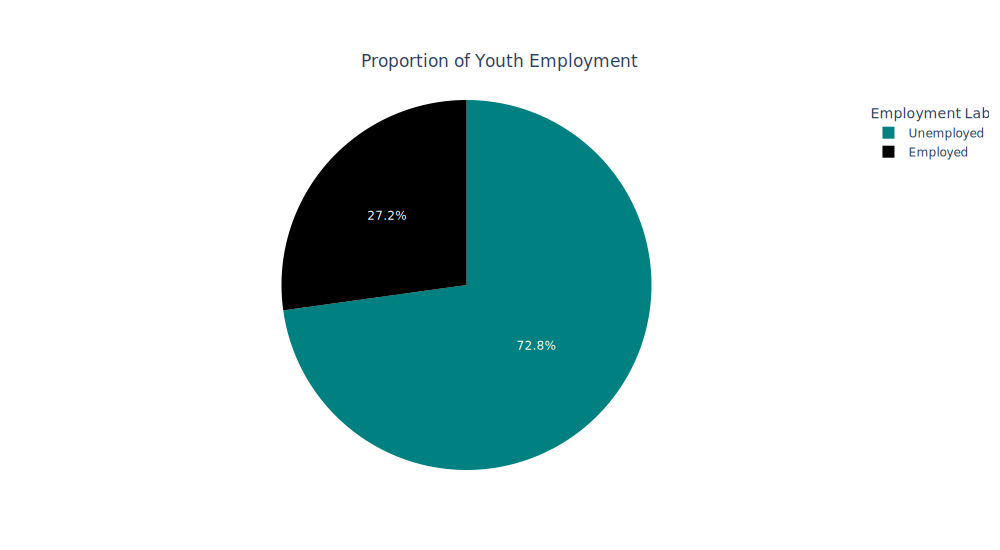

In [13]:
fig = px.pie(
    train_df, values=employment_count.values, names=['Unemployed', 'Employed'],
    title='Proportion of Youth Employment',
    color_discrete_sequence=plot_color
)

fig.update_layout(legend_title_text='Employment Label')
custom_show(fig)

#### Boxplot of `Tenure` and `Birthyear`

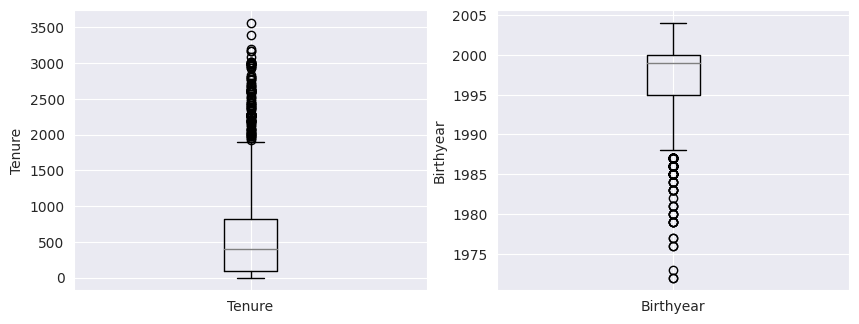

In [14]:
# Boxplots to visualize potential outliers
outlier_columns = ['Tenure', 'Birthyear']

def plot_outliers(outlier_columns):
    plt.figure(figsize=(10,8))
    
    for idx, column in enumerate(outlier_columns):
        plt.subplot(2, 2, idx+1)
        fig = train_df.boxplot(column=column)
        fig.set_ylabel(column)
        

plot_outliers(outlier_columns)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.2. Bivariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

#### `Birthyear` vs `Target`

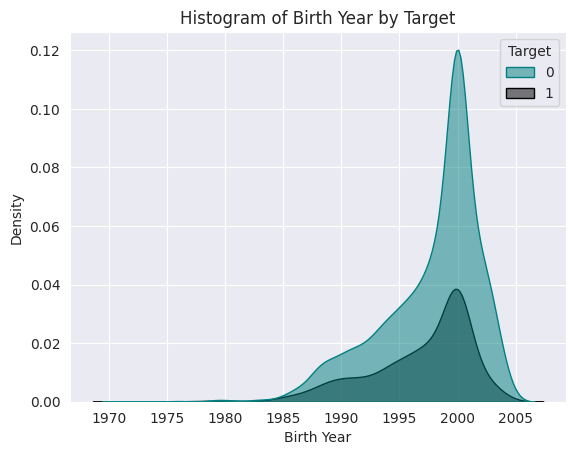

In [15]:
sns.kdeplot(data=train_df, x="Birthyear", hue="Target", fill=True, alpha=0.5)
plt.xlabel("Birth Year")
plt.title("Histogram of Birth Year by Target")
plt.show()

#### `Geography` vs `Target`

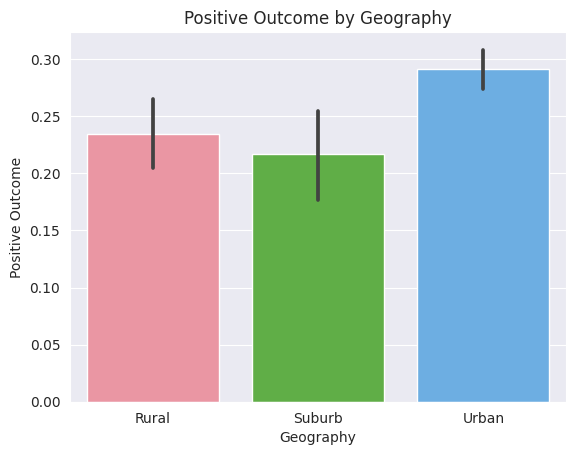

In [16]:
sns.barplot(train_df, x='Geography', y='Target')

plt.xlabel('Geography')
plt.ylabel('Positive Outcome')
plt.title('Positive Outcome by Geography');

<a id="data_preprocessing"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Data Preparation and Preprocessing</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Feature Engineering</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [18]:
raw_df = train_df.copy()

In [19]:
# Perform a simple feature engineering 

def simple_fe(df):
    df['Year_survey'] = pd.to_datetime(df['Survey_date']).dt.year
    df['Age_survey'] = df['Year_survey'] - df['Birthyear']
    df['Age_survey'].head()
    
    df = df.drop(columns=['Survey_date'])
    
    return df

In [20]:
train_df = simple_fe(train_df)
test_df = simple_fe(test_df)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.2. Data Preprocessing Pipeline</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [21]:
X_train = train_df.drop(columns=['Target'], axis=1)
y_train = train_df['Target']

In [22]:
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.to_list()

print(num_cols)
print(cat_cols)

['Round', 'Tenure', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Female', 'Sa_citizen', 'Birthyear', 'Birthmonth', 'Year_survey', 'Age_survey']
['Status', 'Geography', 'Province', 'Additional_lang']


In [23]:
num_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_enc', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ord_pipeline = Pipeline(steps=[
    ('ordinal_enc', OrdinalEncoder())
])

In [24]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols),
    ('ord_pipeline', ord_pipeline, ['Geography']), # Ordinal col hardcoded
    ],
    remainder='drop',
    n_jobs=-1
)

In [25]:
set_config(display='diagram')
display(col_trans)

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Round', 'Tenure', 'Matric', 'Degree',
                                  'Diploma', 'Schoolquintile', 'Female',
                                  'Sa_citizen', 'Birthyear', 'Birthmonth',
                                  'Year_survey', 'Age_survey']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Status', 'Geography', 'Province',
                                  'Additional_lang']),
                                ('ord_pipeline',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder())]),
                                 ['Geography'])])

In [26]:
col_trans.fit(X_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/pytho

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Round', 'Tenure', 'Matric', 'Degree',
                                  'Diploma', 'Schoolquintile', 'Female',
                                  'Sa_citizen', 'Birthyear', 'Birthmonth',
                                  'Year_survey', 'Age_survey']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Status', 'Geography', 'Province',
                                  'Additional_lang']),
                                ('ord_pipeline',
                                 Pipeline(steps=[('ordinal_enc',
                                                  OrdinalEncoder())]),
                                 ['Geography'])])

In [27]:
col_trans.get_feature_names_out()

array(['num_pipeline__Round', 'num_pipeline__Tenure',
       'num_pipeline__Matric', 'num_pipeline__Degree',
       'num_pipeline__Diploma', 'num_pipeline__Schoolquintile',
       'num_pipeline__Female', 'num_pipeline__Sa_citizen',
       'num_pipeline__Birthyear', 'num_pipeline__Birthmonth',
       'num_pipeline__Year_survey', 'num_pipeline__Age_survey',
       'cat_pipeline__Status_employment programme',
       'cat_pipeline__Status_other', 'cat_pipeline__Status_self employed',
       'cat_pipeline__Status_studying', 'cat_pipeline__Status_unemployed',
       'cat_pipeline__Status_wage and self employed',
       'cat_pipeline__Status_wage employed',
       'cat_pipeline__Geography_Rural', 'cat_pipeline__Geography_Suburb',
       'cat_pipeline__Geography_Urban',
       'cat_pipeline__Province_Eastern Cape',
       'cat_pipeline__Province_Free State',
       'cat_pipeline__Province_Gauteng',
       'cat_pipeline__Province_KwaZulu-Natal',
       'cat_pipeline__Province_Limpopo',
       '

In [28]:
X_train = col_trans.transform(X_train)
X_test = col_trans.transform(test_df)

assert X_train.shape[1] == X_test.shape[1]

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.

In [29]:
X_train.shape, y_train.shape

((4020, 38), (4020,))

<a id="baseline"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Baseline Models</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from lightgbm import LGBMClassifier

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



In [31]:
lgbm_clf = LGBMClassifier(n_jobs=-1)

In [32]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(lgbm_clf, X_train, y_train, scoring='roc_auc', cv=cv)

# Print the mean ROC AUC score across folds
print('Mean ROC AUC:', scores.mean()) 

Mean ROC AUC: 0.8616002658818764


<a id="optimization"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7. Optimization: Hyperparameter Tuning</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<a id="grid_search_cv"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.1. Grid Search CV</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [33]:
from sklearn import model_selection 

In [34]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 12, 17, 25],
    'colsample_bytree': [0.6, 0.7, 0.9, 1.0]
}

In [35]:
model = model_selection.GridSearchCV(
    estimator = lgbm_clf,
    param_grid = param_grid,
    scoring = 'roc_auc',
    verbose = 1,
    cv = cv
)

In [36]:
# fit the model and extract best score
model.fit(X_train, y_train)

print(f"Best score: {model.best_score_}")

print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best score: 0.8622812891846421
Best parameters set:
	colsample_bytree: 0.9
	learning_rate: 0.05
	max_depth: 12


<a id="randomized_search_cv"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.2. Randomized Search CV</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [37]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 12, 15, 17, 25],
    'colsample_bytree': [0.6, 0.7, 0.9, 1.0],
    'num_leaves': [20, 31, 63, 127],
    'subsample': [0.5, 0.8, 0.9, 1.0],
}

In [38]:
model = model_selection.RandomizedSearchCV(
    estimator = lgbm_clf, 
    param_distributions = param_grid,
    n_iter = 10,
    scoring = 'roc_auc',
    verbose = 1, 
    cv = cv
)

In [39]:
# fit the model and extract best score
model.fit(X_train, y_train)

print(f"Best score: {model.best_score_}")

print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {best_parameters[param_name]}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best score: 0.8600389651095861
Best parameters set:
	colsample_bytree: 0.7
	learning_rate: 0.1
	max_depth: 25
	num_leaves: 31
	subsample: 0.5


<a id="bayes_optimization"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.3. Bayesian Optimization with Gaussian Process</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [40]:
def optimize(params, param_names, x, y):
    params = dict(zip(param_names, params))
    model = ensemble.LGBMClassifier(**params)
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    auc_roc = []
    for idx in kf.split(X=x, y=y):
        train_idx, test_idx = idx[0], idx[1]
        xtrain = x[train_idx]
        ytrain = y[train_idx]
        
        xtest = x[test_idx]
        ytest = y[test_idx]
        
        model.fit(xtrain, ytrain)
        preds = model.predict_proba(xtest)
        
        fold_auc_roc = metric.roc_auc_score(ytest, preds)
        auc_roc.append(fold_auc_roc)
        
    # This optimization was suspended!

<a id="performance_summary"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8. Performance Comparison and Summary</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

Grid Search CV seem to give the 'best' result with the following hyperparameters

Best score: 0.8622812891846421

learning_rate: 0.05

max_depth: 12

colsample_bytree: 0.9

In [41]:
# retrain model using the optimal hyperparameters found

final_model = LGBMClassifier(learning_rate=0.05,
                             max_depth=12,
                             colsample_bytree=0.9)
        
final_model.fit(X_train, y_train)

preds = final_model.predict(X_test)

preds

array([1, 0, 0, ..., 0, 0, 0])

In [42]:
submission_df.head()

,Person_id,Target
0,Id_r90136smvl,
1,Id_wawdqhmu6s,
2,Id_ap2czff2bu,
3,Id_uhgink7iha,
4,Id_5j6bzk3k81,


In [43]:
submission_df['Target'] = preds

submission_df.to_csv('submission.csv', index=None)

In [44]:
submission_df.head()

,Person_id,Target
0,Id_r90136smvl,1
1,Id_wawdqhmu6s,0
2,Id_ap2czff2bu,0
3,Id_uhgink7iha,0
4,Id_5j6bzk3k81,0


<a id="pred_single_input"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">9. Make Prediction on a single Input</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [45]:
single_input = {
    'Survey_date': '2022-02-23',
    'Round': 2,
    'Status': 'studying',
    'Tenure': np.nan,
    'Geography': 'Rural',
    'Province': 'Mpumalanga',
    'Matric': 1.00,
    'Degree': 0.00,
    'Diploma': 0.00,
    'Schoolquintile': 3.00,
    'Additional_lang': '50 - 59 %',
    'Female': 1,
    'Sa_citizen': 1,
    'Birthyear': 2000,
    'Birthmonth': 5,
}

In [46]:
input_df = pd.DataFrame([single_input])
input_df

,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Additional_lang,Female,Sa_citizen,Birthyear,Birthmonth
0,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.00,0.00,0.00,3.00,50 - 59 %,1,1,2000,5


In [47]:
input_df = simple_fe(input_df)
input_df

,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Additional_lang,Female,Sa_citizen,Birthyear,Birthmonth,Year_survey,Age_survey
0,2,studying,NaN,Rural,Mpumalanga,1.00,0.00,0.00,3.00,50 - 59 %,1,1,2000,5,2022,22


In [48]:
X_input = col_trans.transform(input_df)
X_input

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

array([[0.33333333, 0.16373121, 1.        , 0.        , 0.        ,
        0.6       , 1.        , 1.        , 0.875     , 0.36363636,
        0.5       , 0.125     , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [49]:
final_model.predict(X_input)

array([0])

<a id="save_model"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">10. Save Model</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [50]:
import joblib

In [51]:
model = {
    'col_transformer': col_trans,
    'classifier': final_model
}

In [52]:
joblib.dump(model, 'youth_income_pred.joblib')

['youth_income_pred.joblib']

In [53]:
print(joblib.__version__)

1.3.2
